take data from https://github.com/brentjens/lofar-antenna-positions/tree/master/share/lofarantpos



In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib notebook


In [3]:
antpos = pd.read_csv("/home/mkuiack1/A12_pipeline/etrs-antenna-positions.csv")

In [4]:
antpos = antpos.loc[antpos['ANTENNA-TYPE'].isin(["LBA"])]
# antpos = antpos.loc[antpos['STATION'].isin(["CS002"])]
antpos = antpos.loc[antpos['STATION'].isin(["CS002","CS003","CS004",
                                            "CS005","CS006","CS007",
                                            "CS001","CS011","CS013",
                                            "CS017","CS021","CS032"])]

In [7]:
antpos

,STATION,ANTENNA-TYPE,ANTENNA-ID,ETRS-X,ETRS-Y,ETRS-Z,RCU-X,RCU-Y
0,CS001,LBA,0,3826923.942,460915.117,5064643.229,0,1
1,CS001,LBA,1,3826921.923,460914.874,5064644.767,2,3
2,CS001,LBA,2,3826922.604,460917.222,5064644.043,4,5
3,CS001,LBA,3,3826924.742,460917.480,5064642.415,6,7
4,CS001,LBA,4,3826925.961,460915.360,5064641.691,8,9
...,...,...,...,...,...,...,...,...
2395,CS032,LBA,91,3826904.408,460349.693,5064709.120,87,86
2396,CS032,LBA,92,3826868.862,460359.892,5064734.880,89,88
2397,CS032,LBA,93,3826863.406,460381.487,5064737.023,91,90
2398,CS032,LBA,94,3826859.320,460397.255,5064738.665,93,92


In [136]:
inner_index = antpos["ANTENNA-ID"] < 48
index = inner_index

In [48]:
# LOFAR mode antenna ordering 

# OUTER
print("OUTER")
print(np.arange(48,96))

# INNER
print("INNER")
print(np.arange(0,48))

# EVEN
EVEN_index = np.array([int((rcu/2)%2)*48+int(rcu/2) for rcu in range(96)])
_, idx = np.unique(EVEN_index, return_index=True)
print("EVEN")
print(EVEN_index[np.sort(idx)])

# ODD
ODD_index = np.array([(1-int((rcu/2)%2))*48+int(rcu/2) for rcu in range(96)])
_, idx = np.unique(ODD_index, return_index=True)
print("ODD")
print(ODD_index[np.sort(idx)])

OUTER
[48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
INNER
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
EVEN
[ 0 49  2 51  4 53  6 55  8 57 10 59 12 61 14 63 16 65 18 67 20 69 22 71
 24 73 26 75 28 77 30 79 32 81 34 83 36 85 38 87 40 89 42 91 44 93 46 95]
ODD
[48  1 50  3 52  5 54  7 56  9 58 11 60 13 62 15 64 17 66 19 68 21 70 23
 72 25 74 27 76 29 78 31 80 33 82 35 84 37 86 39 88 41 90 43 92 45 94 47]


In [10]:
antfilename = "A12-LBA_ODD-AntennaField.conf"

with open('/home/mkuiack1/A12_pipeline/'+antfilename, 'a') as the_file:
            the_file.write('''NORMAL_VECTOR LBA
3 [ 0.598753   0.072099   0.797682 ]

ROTATION_MATRIX LBA
3 x 3 [
 -0.1195951054 -0.7919544517  0.5987530018
  0.9928227484 -0.0954186800  0.0720990002
  0.0000330969  0.6030782884  0.7976820024
]

LBA
3 [ 0.0 0.0 0.0 ]
576 x 2 x 3 [ \n''')

for station in ["CS002","CS003","CS004",
                "CS005","CS006","CS007",
                "CS001","CS011","CS013",
                "CS017","CS021","CS032"]:

    stationpos = antpos.loc[antpos['STATION'].isin([station])].set_index("ANTENNA-ID")
    
    _, idx = np.unique(ODD_index, return_index=True)
    index = ODD_index[np.sort(idx)]
    
    for antenna in stationpos.loc[index].values:

        with open('/home/mkuiack1/A12_pipeline/'+antfilename, 'a') as the_file:
            the_file.write(" {0} {1} {2}    {0} {1} {2} \n".format(round(antenna[2],3),
                                        round(antenna[3],3),
                                        round(antenna[4],3)))
            
with open('/home/mkuiack1/A12_pipeline/'+antfilename, 'a') as the_file:
            the_file.write("]")


576


In [8]:
48*12

576

In [120]:
for ant in antpos[index].values:
    print (ant)

['CS002' 'LBA' 0 3826577.462 461022.624 5064892.526000001 0 1]
['CS002' 'LBA' 1 3826575.443 461022.381 5064894.063999999 2 3]
['CS002' 'LBA' 2 3826576.124 461024.729 5064893.34 4 5]
['CS002' 'LBA' 3 3826578.262 461024.987 5064891.712 6 7]
['CS002' 'LBA' 4 3826579.481 461022.867 5064890.988 8 9]
['CS002' 'LBA' 5 3826578.8 461020.519 5064891.712 10 11]
['CS002' 'LBA' 6 3826576.662 461020.261 5064893.34 12 13]
['CS002' 'LBA' 7 3826574.389 461018.499 5064895.205 14 15]
['CS002' 'LBA' 8 3826572.869 461022.071 5064896.024 16 17]
['CS002' 'LBA' 9 3826573.497 461025.901 5064895.206 18 19]
['CS002' 'LBA' 10 3826575.981 461028.19899999996 5064893.133 20 21]
['CS002' 'LBA' 11 3826579.1580000003 461027.888 5064890.777 22 23]
['CS002' 'LBA' 12 3826581.541 461025.114 5064889.239 24 25]
['CS002' 'LBA' 13 3826582.015 461021.174 5064889.239 26 27]
['CS002' 'LBA' 14 3826580.3589999997 461017.914 5064890.777 28 29]
['CS002' 'LBA' 15 3826577.348 461016.857 5064893.133 30 31]
['CS002' 'LBA' 16 3826576.625 

In [26]:
RCU = 3
(1-int((RCU)%2))*48+int(RCU/2)

1

In [41]:
stationpos.loc[ODD_index[np.sort(idx)]]

,STATION,ANTENNA-TYPE,ETRS-X,ETRS-Y,ETRS-Z,RCU-X,RCU-Y
ANTENNA-ID,,,,,,,
48,CS002,LBA,3826579.845,461004.829,5064892.346,1,0
1,CS002,LBA,3826575.443,461022.381,5064894.064,2,3
50,CS002,LBA,3826566.631,461008.153,5064901.964,5,4
3,CS002,LBA,3826578.262,461024.987,5064891.712,6,7
52,CS002,LBA,3826561.401,461028.186,5064904.079,9,8
5,CS002,LBA,3826578.800,461020.519,5064891.712,10,11
54,CS002,LBA,3826577.824,461040.425,5064890.646,13,12
7,CS002,LBA,3826574.389,461018.499,5064895.205,14,15
56,CS002,LBA,3826590.845,461028.566,5064881.943,17,16


In [44]:
stationpos = antpos.loc[antpos['STATION'].isin(["CS002"])].set_index("ANTENNA-ID")

index = ODD_index[np.sort(idx)]

for antenna in stationpos.loc[index].values:
    print (" {0} {1} {2}    {0} {1} {2} \n".format(round(antenna[2],3),
                                        round(antenna[3],3),
                                        round(antenna[4],3)))
# ODD_index[np.sort(idx)]

 3826579.845 461004.829 5064892.346    3826579.845 461004.829 5064892.346 

 3826575.443 461022.381 5064894.064    3826575.443 461022.381 5064894.064 

 3826566.631 461008.153 5064901.964    3826566.631 461008.153 5064901.964 

 3826578.262 461024.987 5064891.712    3826578.262 461024.987 5064891.712 

 3826561.401 461028.186 5064904.079    3826561.401 461028.186 5064904.079 

 3826578.8 461020.519 5064891.712    3826578.8 461020.519 5064891.712 

 3826577.824 461040.425 5064890.646    3826577.824 461040.425 5064890.646 

 3826574.389 461018.499 5064895.205    3826574.389 461018.499 5064895.205 

 3826590.845 461028.566 5064881.943    3826590.845 461028.566 5064881.943 

 3826573.497 461025.901 5064895.206    3826573.497 461025.901 5064895.206 

 3826590.234 461011.978 5064883.902    3826590.234 461011.978 5064883.902 

 3826579.158 461027.888 5064890.777    3826579.158 461027.888 5064890.777 

 3826582.152 460998.116 5064891.221    3826582.152 460998.116 5064891.221 

 3826582.015 461

<IPython.core.display.Javascript object>


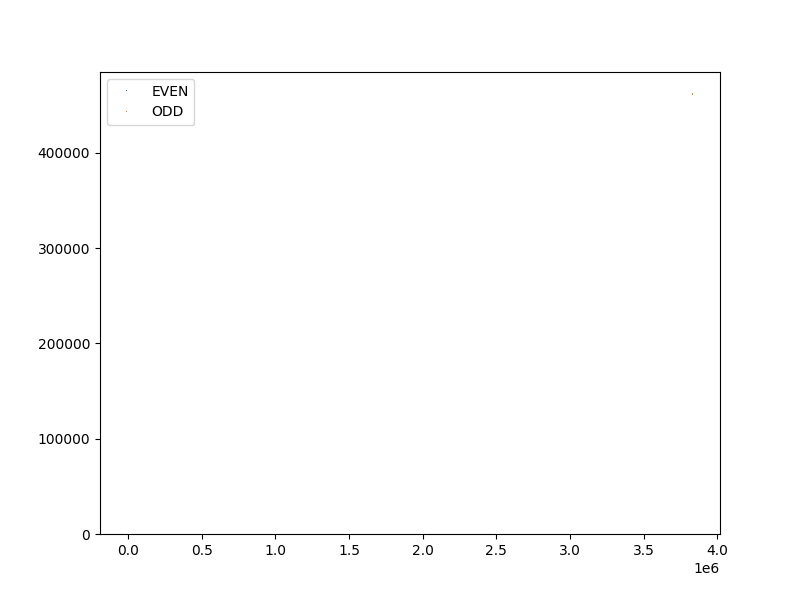

In [7]:
inner_index = antpos["ANTENNA-ID"] < 48
outer_index = antpos["ANTENNA-ID"] > 47
# sparse_even = antpos["ANTENNA-ID"] % 2 == 0
# sparse_odd = ~sparse_even

# print(np.sum(inner_index),np.sum(outer_index),
#       np.sum(sparse_even),np.sum(sparse_odd),)

index = inner_index

plt.figure(figsize=(8,6))
plt.plot(antpos[index]["ETRS-X"], 
         antpos[index]["ETRS-Y"],",",label="EVEN")

index = outer_index


plt.plot(antpos[index]["ETRS-X"], 
         antpos[index]["ETRS-Y"], ",", label="ODD")
plt.legend()


In [49]:
dist = [] 

for station in ["CS002","CS003","CS004",
                "CS005","CS006","CS007",
                "CS001","CS011","CS013",
                "CS017","CS021","CS032"]:

    stationpos = antpos.loc[antpos['STATION'].isin([station])].set_index("ANTENNA-ID")
    
    _, idx = np.unique(ODD_index, return_index=True)
    index = ODD_index[np.sort(idx)]
    
    for antenna in stationpos.loc[index].values:
            
        dist.append([antenna[2],antenna[3]])

In [50]:
dist

[[3826579.845, 461004.82899999997],
 [3826575.443, 461022.381],
 [3826566.631, 461008.153],
 [3826578.262, 461024.987],
 [3826561.401, 461028.186],
 [3826578.8, 461020.519],
 [3826577.8239999996, 461040.425],
 [3826574.389, 461018.499],
 [3826590.845, 461028.566],
 [3826573.497, 461025.901],
 [3826590.2339999997, 461011.97799999994],
 [3826579.1580000003, 461027.888],
 [3826582.152, 460998.11600000004],
 [3826582.015, 461021.174],
 [3826567.152, 461001.274],
 [3826577.348, 461016.857],
 [3826558.276, 461023.43100000004],
 [3826573.729, 461014.19299999997],
 [3826563.8, 461043.29799999995],
 [3826569.465, 461024.669],
 [3826581.887, 461047.68],
 [3826572.423, 461030.81899999996],
 [3826598.341, 461028.31700000004],
 [3826580.3239999996, 461030.641],
 [3826597.167, 460997.00700000004],
 [3826585.352, 461024.261],
 [3826574.32, 460991.915],
 [3826582.917, 461016.32899999997],
 [3826556.603, 461006.227],
 [3826575.077, 461008.80700000003],
 [3826551.4760000003, 461034.774],
 [3826570.313, 

<IPython.core.display.Javascript object>


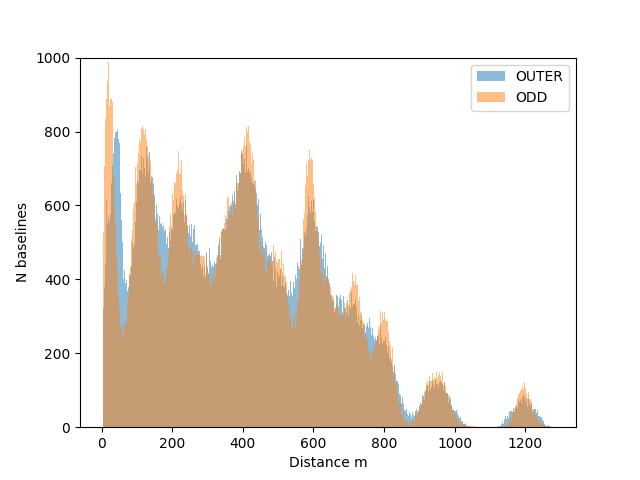

In [69]:
from scipy.spatial.distance import pdist

index = outer_index

plt.figure()
_x = plt.hist(pdist(np.array([antpos[index]["ETRS-X"].values, 
                antpos[index]["ETRS-Y"].values]).T), bins=500, alpha=0.5, label="OUTER")
# plt.title("OUTER")
# plt.xlabel("Distance m")
# plt.ylabel("N baselines")
# plt.ylim([0,1000])

# index = inner_index
# _x = plt.hist(pdist(np.array([antpos[index]["ETRS-X"].values, 
#                 antpos[index]["ETRS-Y"].values]).T), bins=500, alpha=0.5, label="INNER")


# plt.figure()
_x = plt.hist(pdist(dist), bins=500, alpha=0.5, label="ODD")
# plt.title("ODD")
plt.xlabel("Distance m")
plt.ylabel("N baselines")
plt.ylim([0,1000])
plt.legend()

In [44]:
index

0       False
1       False
2       False
3       False
4       False
        ...  
2395     True
2396     True
2397     True
2398     True
2399     True
Name: ANTENNA-ID, Length: 1152, dtype: bool

In [34]:
len(pdist(np.array([antpos[index]["ETRS-X"].values, 
                antpos[index]["ETRS-Y"].values]).T))

165600

165312.5

In [27]:
np.array([antpos[index]["ETRS-X"].values, antpos[index]["ETRS-Y"].values]).T

array([[3826912.376,  460926.522],
       [3826912.01 ,  460929.574],
       [3826923.241,  460935.454],
       ...,
       [3826863.406,  460381.487],
       [3826859.32 ,  460397.255],
       [3826884.154,  460425.492]])

In [9]:
base = np.array([3826577.022720000, 461022.995082000, 5064892.814])
oldpos = pd.read_csv("/home/mkuiack1/oldpos.csv",dtype=float)


<IPython.core.display.Javascript object>


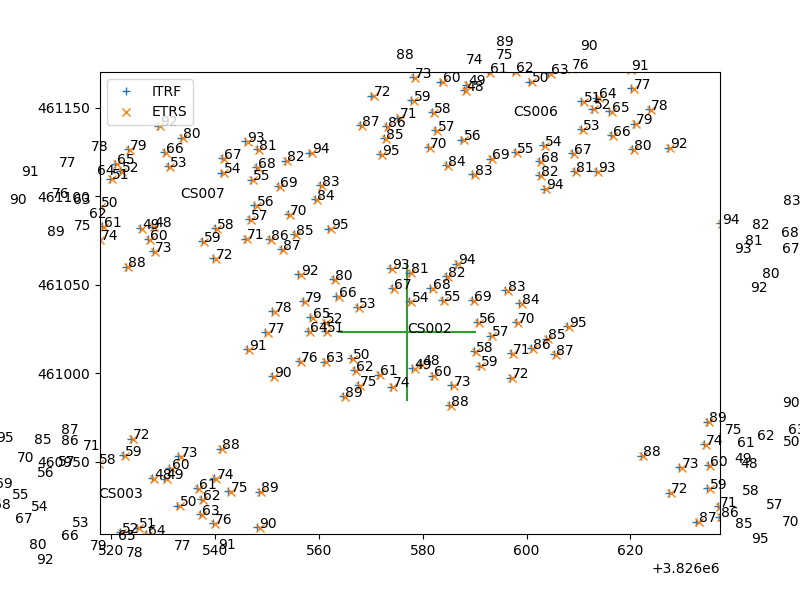

STATION               CS032
ANTENNA-TYPE            LBA
ANTENNA-ID               48
ETRS-X          3.82691e+06
ETRS-Y               460391
ETRS-Z           5.0647e+06
RCU-X                     1
RCU-Y                     0
Name: 2352, dtype: object


In [99]:
plt.figure(figsize=(8,6))
plt.plot(base[0]+oldpos.x,base[1]+oldpos.y, "+",label="ITRF")


index = outer_index
plt.plot(antpos[index]["ETRS-X"], 
         antpos[index]["ETRS-Y"], "x", label="ETRS")

for x,y,id_num in  zip(antpos[index]["ETRS-X"].values, 
         antpos[index]["ETRS-Y"].values, 
         antpos[index]["ANTENNA-ID"].values):

    plt.text(x,y,id_num )

for x,y,id_num in  zip(antpos[index].groupby("STATION").mean()["ETRS-X"],
                       antpos[index].groupby("STATION").mean()["ETRS-Y"],
                       antpos[index].groupby("STATION").mean().index.values):

    plt.text(x,y,id_num )
    
    
check_id = 48*11

# plt.scatter((base[0]+oldpos.x)[check_id],
#             (base[1]+oldpos.y)[check_id], c="C2", marker="+", s=10000 ,zorder=0)
plt.scatter((base[0]),
            (base[1]), c="C2", marker="+", s=10000 ,zorder=0)

plt.legend()

print(antpos[index].iloc[check_id])

In [102]:
antpos[index].reindex(["CS002","CS003","CS004",
                                            "CS005","CS006","CS007",
                                            "CS001","CS011","CS013",
                                            "CS017","CS021","CS032"])

,STATION,ANTENNA-TYPE,ANTENNA-ID,ETRS-X,ETRS-Y,ETRS-Z,RCU-X,RCU-Y
CS002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CS003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CS004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CS005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CS006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CS007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CS001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CS011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CS013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CS017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


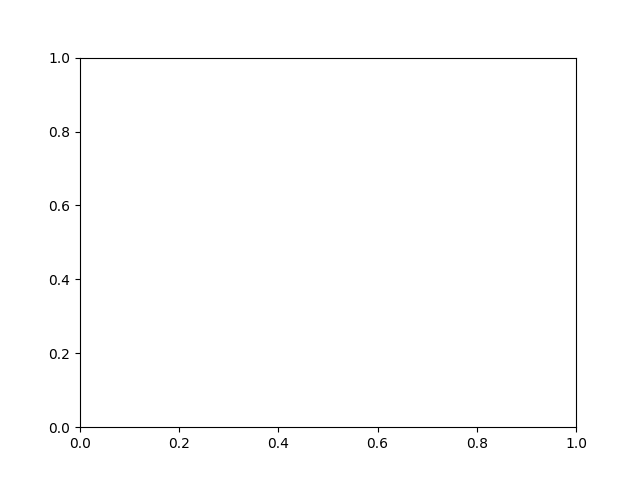

3826924.1995624998 3826924.1995624998 CS001
3826576.9935624995 3826576.9935624995 CS002
3826517.4769583344 3826517.4769583344 CS003
3826654.7281666673 3826654.7281666673 CS004
3826669.2440208327 3826669.2440208327 CS005
3826597.485833334 3826597.485833334 CS006
3826533.2987083322 3826533.2987083322 CS007
3826667.8994583334 3826667.8994583334 CS011
3826346.624958333 3826346.624958333 CS013
3826462.0514791664 3826462.0514791664 CS017
3826407.1633125003 3826407.1633125003 CS021
3826892.1317500006 3826892.1317500006 CS032


In [81]:
plt.figure()
for x,y,id_num in  zip(antpos[index].groupby("STATION").mean()["ETRS-X"].values,
                       antpos[index].groupby("STATION").mean()["ETRS-X"].values,
                       antpos[index].groupby("STATION").mean().index.values):
    print(x,y,id_num)
    plt.text(x,y,id_num )

In [34]:
antpos[index]["ANTENNA-ID"].values

array([48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
       91, 92, 93, 94, 95, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
       60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 80, 81